# Market Response Functions

This notebooks provides simple illustrative examples of how individual customer price response aggregate into the total market response function. 

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
plt.style.use('seaborn-white')
import seaborn as sns
pd.options.mode.chained_assignment = None
plt.rcParams.update({'pdf.fonttype': 'truetype'})

import platform
print(f'Python {platform.python_version()}')

Python 3.9.1


# Market Response Function for Yes-No Customer Choice

We first consider the case of yes-no customer choice. Each customer has a maximum price she is willing to pay for a certain product or service, and she buys exactly one unit when the offered price is below her willingness to pay. This is typcial for services and durable goods.

We generate uniformly distributed willingness-to-pay points for a small population of customers, and aggregate them into the overall market response that approaches the linear price-demand function as the number of customers grows. 

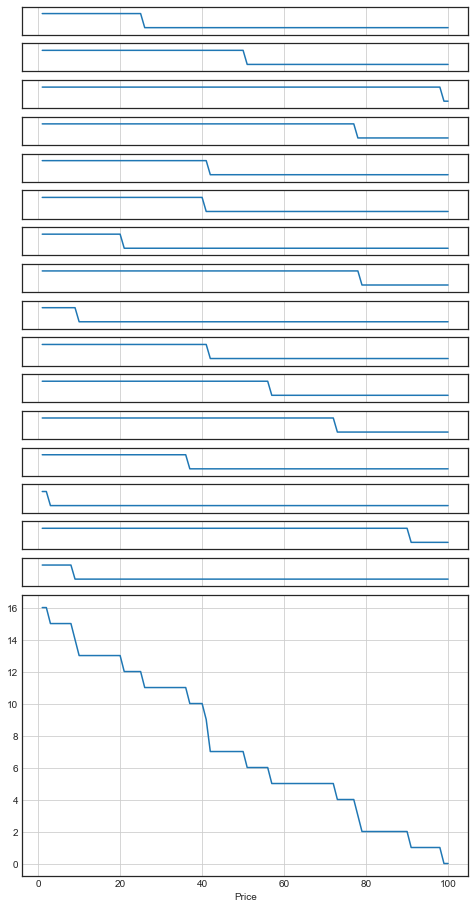

In [2]:
n = 100
n_customers = 16

#
# Generate response functions
#
willingness_to_pay = np.random.randint(0, n, size=n_customers)
y = np.zeros((n_customers, n))
for i, wtp in enumerate(willingness_to_pay):
    y[i, :] = np.hstack([np.ones(wtp), np.zeros(n - wtp)])
    
market_response = np.sum(y, axis=0)

#
# Visualization
#
x = np.linspace(1, n, n)
fig, ax = plt.subplots(len(willingness_to_pay) + 1, 1, figsize=(8,  16), gridspec_kw={'height_ratios': [1]*n_customers + [10]})
for i, wtp in enumerate(willingness_to_pay):
    ax[i].plot(x, y[i])
    ax[i].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i].set_yticks([])
    ax[i].set_ylim([-0.5, 1.5])
    ax[i].grid(True)
    
ax[-1].plot(x, market_response)
ax[-1].grid(True)
ax[-1].set_xlabel('Price')
plt.show()

# Market Response Function for Variable Quantity Choice

Second, we repeat the simulation with variable-quantity responses. Each customer has a randomly parametrized linear response function: she buys more units at lower prices, and fewer units at higher prices.

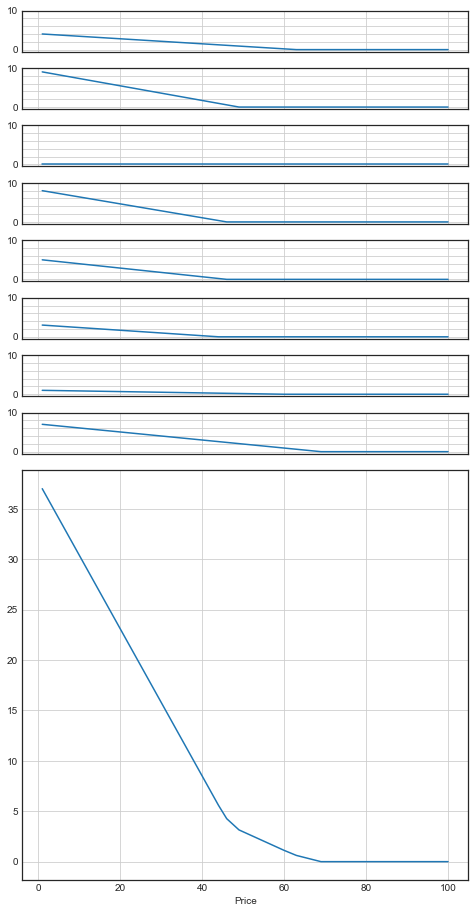

In [8]:
n = 100
n_customers = 8
max_units = 10

#
# Generate response functions
#
max_units_customer = np.random.randint(0, max_units, size=n_customers)
willingness_to_pay = np.random.randint(0, n, size=n_customers)
y = np.zeros((n_customers, n))
for i in range(n_customers):
    y[i, :] = np.hstack([np.linspace(max_units_customer[i], 0, willingness_to_pay[i]), np.zeros(n - willingness_to_pay[i])])
market_response = np.sum(y, axis=0)

#
# Visualization
#
x = np.linspace(1, n, n)
fig, ax = plt.subplots(n_customers + 1, 1, figsize=(8,  16), gridspec_kw={'height_ratios': [1]*n_customers + [10]})
for i in range(n_customers):
    ax[i].plot(x, y[i])
    ax[i].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)
    ax[i].set_ylim([-0.5, max_units])
    ax[i].set_yticks(np.arange(0, max_units, 2), minor=True)
    ax[i].grid(which='both')
    
ax[-1].plot(x, market_response)
ax[-1].grid(True)
ax[-1].set_xlabel('Price')
plt.show()

# Standard Market-Response Functions

In this section, we plot several standard market response functions and the corresponding price elasticities computed emperically. 

<ipython-input-13-8d164d3725a8>:31: RuntimeWarning: divide by zero encountered in power
  demand_function = lambda p: 5*np.power(p, epsilon)
<ipython-input-13-8d164d3725a8>:31: RuntimeWarning: divide by zero encountered in power
  demand_function = lambda p: 5*np.power(p, epsilon)


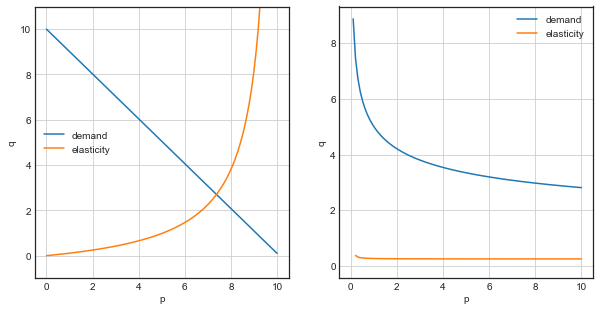

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

#
# Calculate the empirical price elasticity of demand
#
def empirical_elasticity(p, q):
    e = np.zeros(len(q))
    for i in range(1, len(q)):
        e[i] = -(q[i] - q[i-1])/(p[i] - p[i-1]) * (p[i] / q[i])
    return e

#
# Linear function
#
a, b = 10, 0.99
demand_function = lambda p: a - b*p

p = np.linspace(0, 10, 100)
ax[0].plot(p, demand_function(p), label='demand')
ax[0].plot(p, empirical_elasticity(p, demand_function(p)), label='elasticity')
ax[0].grid(True)
ax[0].set_xlabel('p')
ax[0].set_ylabel('q')
ax[0].legend()
ax[0].set_ylim([-1, a+1])

#
# Constant-elasticity function
#
epsilon = -0.25
demand_function = lambda p: 5*np.power(p, epsilon)

p = np.linspace(0, 10, 100)
ax[1].plot(p, demand_function(p), label='demand')
ax[1].plot(p, empirical_elasticity(p, demand_function(p)), label='elasticity')
ax[1].grid(True)
ax[1].set_xlabel('p')
ax[1].set_ylabel('q')
ax[1].legend()
plt.savefig('price-response.pdf')
plt.show()